In [119]:
import seml
import pandas as pd
from run_seml import run
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 120)

In [2]:
%load_ext autoreload
%autoreload 2

In [93]:
seml_results = seml.get_results('rgnn_pprgo_cora_citeseer', to_data_frame=True)

In [58]:
len(seml_results)

1200

In [94]:
relevant_columns = ['_id', 
       'config.model_params.model',
       'config.dataset', 
       #'config.model_params.mean',
       'result.accuracy',
        'config.model_params.hidden_size',
       'config.model_params.nlayers',
       'config.model_params.dropout', 
       'config.model_params.alpha',
       'config.model_params.eps',
       'config.model_params.topk', 
       #'config.model_params.mean_kwargs.temperature',
       #'config.model_params.mean_kwargs.k',
       #'config.model_params.mean_kwargs.with_weight_correction',
       #'config.model_params.do_cache_adj_prep', 
       'config.model_params.ppr_normalization',
       #'config.train_params.lr',
       #'config.train_params.weight_decay', 'config.train_params.patience',
       #'config.train_params.max_epochs', 'config.train_params.batch_mult_val',
       #'config.train_params.batch_size', 'config.binary_attr', 'config.seed',
       #'config.artifact_dir', 'config.model_storage_type', 'config.device',
       #'config.display_steps', 'config.data_device', 'config.data_dir',
       # 'result.trace_val', 'result.trace_train',
       #'result.model_path'
       ]
seml_results.columns

Index(['_id', 'config.overwrite', 'config.db_collection', 'config.dataset',
       'config.model_params.label', 'config.model_params.model',
       'config.model_params.dropout', 'config.model_params.n_filters',
       'config.model_params.gdc_params', 'config.model_params.svd_params',
       'config.model_params.jaccard_params',
       'config.model_params.do_cache_adj_prep', 'config.model_params.alpha',
       'config.model_params.eps', 'config.model_params.hidden_size',
       'config.model_params.nlayers', 'config.model_params.ppr_normalization',
       'config.model_params.topk', 'config.train_params.lr',
       'config.train_params.weight_decay', 'config.train_params.patience',
       'config.train_params.max_epochs', 'config.train_params.batch_mult_val',
       'config.train_params.batch_size', 'config.binary_attr', 'config.seed',
       'config.artifact_dir', 'config.model_storage_type', 'config.device',
       'config.display_steps', 'config.data_device', 'config.data_dir',
  

In [95]:
seml_results[relevant_columns]

,_id,config.model_params.model,config.dataset,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.eps,config.model_params.topk,config.model_params.ppr_normalization
0,1,PPRGo,cora_ml,0.710672,32,4,0.10,0.25,0.01,64,sym
1,2,PPRGo,cora_ml,0.735573,64,3,0.50,0.25,0.01,64,sym
2,3,PPRGo,cora_ml,0.667194,32,4,0.10,0.50,0.01,64,sym
3,4,PPRGo,cora_ml,0.701186,64,3,0.50,0.50,0.01,64,sym
4,5,PPRGo,cora_ml,0.693281,64,2,0.25,0.50,0.01,64,sym
...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,PPRGo,citeseer,0.583957,32,3,0.25,0.25,0.01,64,row
2396,2397,PPRGo,citeseer,0.618717,128,2,0.50,0.50,0.01,64,row
2397,2398,PPRGo,citeseer,0.595187,128,3,0.50,0.50,0.01,64,row
2398,2399,PPRGo,citeseer,0.679144,32,2,0.10,0.25,0.01,64,row


In [132]:
groups = [
"config.dataset",
"config.binary_attr",
#"config.model_params.ppr_normalization",
#"config.model_params.hidden_size",
#"config.model_params.nlayers",
#"config.model_params.alpha",
# "config.model_params.dropout"
]
seml_results.groupby(groups).mean()[['result.accuracy']]

result.accuracy
config.dataset config.binary_attr                 
citeseer       False                      0.640665
               True                       0.639938
cora_ml        False                      0.725172
               True                       0.721921

In [52]:
#sum(list(seml_results["config.dataset"] == "citeseer")  and list(seml_results["config.model_params.mean"] == "soft_k_medoid"))

1200

In [96]:
cora_results = seml_results[list(seml_results["config.dataset"] == "cora_ml")]
#cora_median_results = cora_results[cora_results["config.model_params.mean"] == "soft_median"]
#cora_mediod_results = cora_results[cora_results["config.model_params.mean"] == "soft_k_medoid"]

citeseer_results = seml_results[list(seml_results["config.dataset"] == "citeseer")]
#citeseer_median_results = citeseer_results[citeseer_results["config.model_params.mean"] == "soft_median"]
#citeseer_mediod_results = citeseer_results[citeseer_results["config.model_params.mean"] == "soft_k_medoid"]

#len(cora_median_results),len(cora_mediod_results),len(citeseer_median_results),len(citeseer_mediod_results)                    

In [103]:
metric = "result.accuracy"
best_results = cora_results[cora_results[metric] == cora_results[metric].max()]

best_results = pd.concat([
    best_results,
    citeseer_results[citeseer_results[metric] == citeseer_results[metric].max()]])
    
best_results[relevant_columns]

,_id,config.model_params.model,config.dataset,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.eps,config.model_params.topk,config.model_params.ppr_normalization
1791,1792,PPRGo,cora_ml,0.805534,64,2,0.1,0.1,0.01,64,row
1903,1904,PPRGo,citeseer,0.749198,64,2,0.1,0.1,0.01,64,row
1991,1992,PPRGo,citeseer,0.749198,64,2,0.1,0.1,0.01,64,row
2203,2204,PPRGo,citeseer,0.749198,64,2,0.1,0.1,0.01,64,row


In [57]:
metric = "result.accuracy"
best_results = cora_median_results[cora_median_results[metric] == cora_median_results[metric].max()]

best_results = pd.concat([
    best_results,
    cora_mediod_results[cora_mediod_results[metric] == cora_mediod_results[metric].max()]])
    
best_results = pd.concat([
    best_results,
    citeseer_median_results[citeseer_median_results[metric] == citeseer_median_results[metric].max()]])

best_results = pd.concat([
    best_results,
    citeseer_mediod_results[citeseer_mediod_results[metric] == citeseer_mediod_results[metric].max()]])

best_results[relevant_columns]

,_id,config.dataset,config.model_params.model,config.model_params.dropout,config.model_params.do_cache_adj_prep,config.model_params.alpha,config.model_params.eps,config.model_params.hidden_size,config.model_params.mean,config.model_params.mean_kwargs.temperature,config.model_params.nlayers,result.accuracy
1948,1949,citeseer,RobustPPRGo,0.50,True,0.25,0.01,64,soft_median,NaN,2,0.714973
345,346,cora_ml,RobustPPRGo,0.25,True,0.25,0.01,64,soft_k_medoid,50.0,2,0.763636
1948,1949,citeseer,RobustPPRGo,0.50,True,0.25,0.01,64,soft_median,NaN,2,0.714973
345,346,cora_ml,RobustPPRGo,0.25,True,0.25,0.01,64,soft_k_medoid,50.0,2,0.763636


In [104]:
print(best_results[relevant_columns].to_markdown())

|      |   _id | config.model_params.model   | config.dataset   |   result.accuracy |   config.model_params.hidden_size |   config.model_params.nlayers |   config.model_params.dropout |   config.model_params.alpha |   config.model_params.eps |   config.model_params.topk | config.model_params.ppr_normalization   |
|-----:|------:|:----------------------------|:-----------------|------------------:|----------------------------------:|------------------------------:|------------------------------:|----------------------------:|--------------------------:|---------------------------:|:----------------------------------------|
| 1791 |  1792 | PPRGo                       | cora_ml          |          0.805534 |                                64 |                             2 |                           0.1 |                         0.1 |                      0.01 |                         64 | row                                     |
| 1903 |  1904 | PPRGo                       | citeseer

In [89]:
def epoch_mean(trace, epoch_num):
    epoch_mean = list()
    batches_per_epoch = int(len(trace) / epoch_num)
    for i in range(epoch_num):
        epoch_mean.append(sum(trace[i * batches_per_epoch:(i+1) * batches_per_epoch]) / batches_per_epoch)
    return epoch_mean

In [90]:
id = 240
exp = seml_results.iloc[id]

epoch_num = exp["config.train_params.max_epochs"]
val_loss = epoch_mean(exp["result.trace_val.loss"], epoch_num)
val_acc = epoch_mean(exp["result.trace_val.acc"], epoch_num)
train_loss = epoch_mean(exp["result.trace_train.loss"], epoch_num)
train_acc = epoch_mean(exp["result.trace_train.acc"], epoch_num)

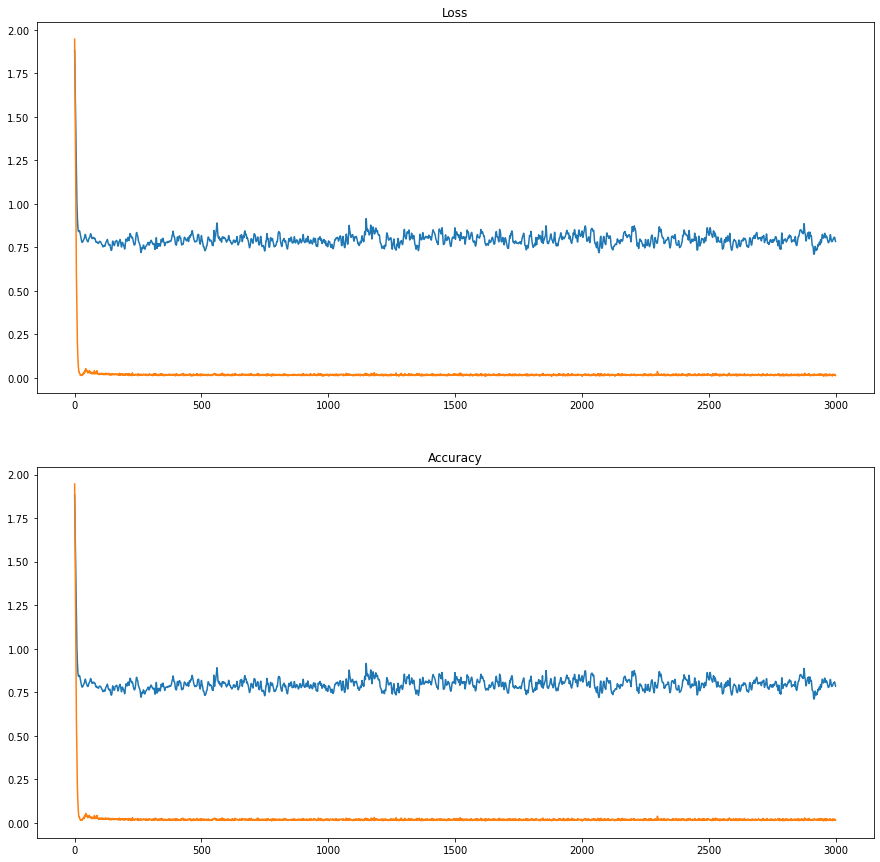

In [91]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1, figsize=(15, 15))
axs[0].set_title("Loss")
axs[0].plot(train_loss)
axs[0].plot(val_loss)
axs[1].set_title("Accuracy")
axs[1].plot(train_acc)
axs[1].plot(val_acc)
plt.show()

In [42]:
epoch_mean

<function sum(iterable, /, start=0)>

In [85]:
len(exp["result.trace_val.loss"]) / num_epochs

NameError: name 'num_epochs' is not defined

1.0

In [ ]:
len(train_loss)